In [1]:
import pandas as pd
import numpy as np
from utils.imageprocessing import *
from sklearn.model_selection import train_test_split

### Load data

In [10]:
df_codis_color_info =  pd.read_csv("data/codis_info.csv")

### Preprocessing

In [11]:
color1 = df_codis_color_info.filter(regex = "color1_[RGB]").values
color2 = df_codis_color_info.filter(regex = "color2_[RGB]").values
color3 = df_codis_color_info.filter(regex = "color3_[RGB]").values

In [12]:
X0 = np.concatenate([color1, color2], axis = 1)
y = color3

In [13]:
X0_train, X0_test, y_train, y_test = train_test_split(X0, y, test_size = 0.001)

In [14]:
X0_train.shape, X0_test.shape, y_train.shape, y_test.shape

((1114, 6), (2, 6), (1114, 3), (2, 3))

In [15]:
### change form (sample, timesteps, input_dim)
X_train = X0_train.reshape((X0_train.shape[0], 2, 3)) /256
X_test = X0_test.reshape((X0_test.shape[0], 2, 3)) /256

In [16]:
### change form (sample, timesteps, input_dim)
X = X0.reshape((X0.shape[0], 2, 3)) /256
y = y

### Modeling(RNN)

In [17]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.layers import TimeDistributed
from keras.optimizers import SGD

Using TensorFlow backend.


In [9]:
# np.random.rand(0)
# model = Sequential()
# model.add(SimpleRNN(10, input_shape=(2,3)))
# model.add(Dense(10, activation="relu"))
# model.add(Dense(3, activation="linear"))
# model.compile(loss="mse", optimizer="adam")

In [10]:
# history = model.fit(X, y, epochs=100, verbose=0)

In [11]:
# plt.plot(history.history["loss"])
# plt.title("Loss")
# plt.show()

### 확인

[ 225.54908553  231.38313609  234.0563475 ]
[ 146.84451294  145.24127197  148.03347778]


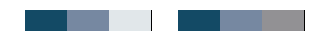

[ 111.74219517  129.04810524  134.95169841]
[ 146.84451294  145.24127197  148.03347778]


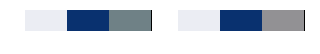

[ 242.45129398  243.41465542  245.62925269]
[ 146.84451294  145.24127197  148.03347778]


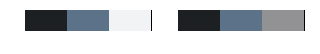

[ 98.89863867  98.49581762  67.59914712]
[ 146.84449768  145.24125671  148.03347778]


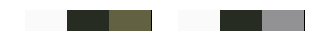

[ 228.9212612   229.31030324  230.06082012]
[ 146.84451294  145.24127197  148.03347778]


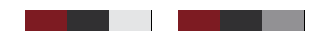

[ 27.72964417  28.16867165  29.4408003 ]
[ 146.84451294  145.24127197  148.03347778]


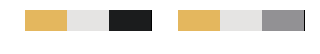

[ 102.09026727  105.15330308   82.77357539]
[ 146.84451294  145.24127197  148.03347778]


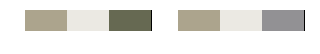

[ 213.24451349  212.95847512  212.06174483]
[ 146.84451294  145.24127197  148.03347778]


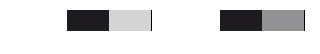

[ 44.62516146  60.91035908  76.53293723]
[ 146.84451294  145.24127197  148.03347778]


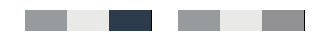

[ 223.19782214  221.73756806  227.9800363 ]
[ 118.03396606  117.28910065  119.64029694]


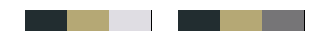

[ 219.14476807  207.72847896  195.61035599]
[ 146.84451294  145.24127197  148.03347778]


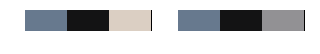

[ 240.16676185  236.29868646  228.2055968 ]
[ 118.03396606  117.28910065  119.64029694]


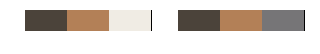

[ 210.01039919  213.8024153   219.45957732]
[ 146.84451294  145.24127197  148.03347778]


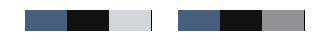

[ 171.63467132  171.71727749  172.55031995]
[ 146.84451294  145.24127197  148.03347778]


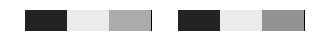

[ 79.96018203  64.6894198   54.49544937]
[ 118.03396606  117.28910065  119.64029694]


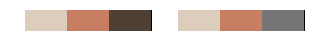

[ 252.63177493  252.50393049  251.60239967]
[ 146.84449768  145.24125671  148.03344727]


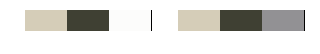

[ 34.16685309  32.52647278  29.87602535]
[ 146.84451294  145.24125671  148.03347778]


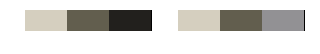

[ 127.41901408  130.33978873  129.70422535]
[ 146.84451294  145.24127197  148.03347778]


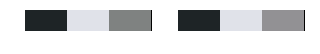

[ 117.07059938  135.94195688  162.28784648]
[ 146.84451294  145.24127197  148.03347778]


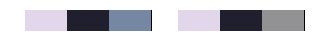

[ 220.6615991   105.96114865   54.51295045]
[ 146.84451294  145.24127197  148.03347778]


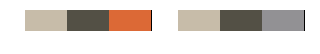

[ 225.46568332  226.30794702  223.11258278]
[ 146.84451294  145.24127197  148.03347778]


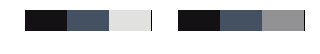

[ 163.55474453  163.35036496  167.76642336]
[ 146.84451294  145.24127197  148.03347778]


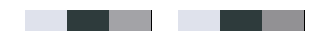

[ 242.74365704  243.50568679  243.93088364]
[ 146.84451294  145.24127197  148.03347778]


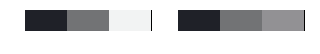

[ 158.52694851  159.99499098  162.6537768 ]
[ 146.84451294  145.24127197  148.03347778]


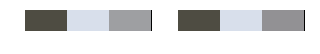

[ 237.52037915  239.45402844  240.92890995]
[ 146.84451294  145.24127197  148.03347778]


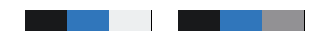

[ 242.96136457  241.75297986  239.02671599]
[ 146.84451294  145.24127197  148.03347778]


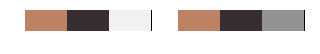

[ 229.68225806  231.31989247  232.04247312]
[ 146.84451294  145.24127197  148.03347778]


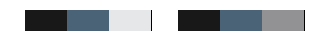

[ 219.30563936  224.40914365  233.19076352]
[ 146.84451294  145.24127197  148.03347778]


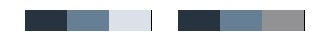

[ 205.15995029  211.48943724  225.28865613]
[ 146.84451294  145.24127197  148.03347778]


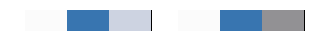

[ 236.1466285   237.09160305  237.71851145]
[ 146.84451294  145.24127197  148.03347778]


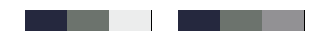

In [13]:
# for idx in range(30):
#     input_color = np.vstack([color1[idx], color2[idx]])[np.newaxis, :, :]
#     color_3_pre = model.predict(input_color)[0]

#     true = [color1[idx], color2[idx], color3[idx]]
#     predict = [color1[idx], color2[idx], color_3_pre]
#     print(color3[idx])
#     print(color_3_pre)
#     bar_true = plot_colors([0.33, 0.33, 0.33], true, h=50, w=300)
#     bar_predict = plot_colors([0.33, 0.33, 0.33], predict, h=50, w=300)
    
#     plt.figure(figsize = (5, 1))  

#     plt.subplot(1, 2, 1)
#     plt.imshow(bar_true)
#     plt.axis('off')
#     plt.subplot(1, 2, 2)
#     plt.imshow(bar_predict)
#     plt.axis('off')
#     plt.show()

### Modeling(NN)

In [35]:
# change form
X0.shape, y.shape

((1116, 6), (1116, 3))

In [44]:
np.random.rand(0)
model1 = Sequential()
model1.add(Dense(5, input_dim=6, activation = "relu"))
model1.add(Dense(3, activation = "linear"))
model1.compile(loss="mse", optimizer="adam")

In [45]:
X = X0/256

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
history = model1.fit(X_train, y_train, validation_data = (X_test, y_test),epochs=2500, verbose=1 )

Train on 892 samples, validate on 224 samples
Epoch 1/2500
892/892 [==============================] - 0s 459us/step - loss: 27045.2374 - val_loss: 26260.7042
Epoch 2/2500
892/892 [==============================] - 0s 57us/step - loss: 26994.1952 - val_loss: 26197.5321
Epoch 3/2500
892/892 [==============================] - 0s 57us/step - loss: 26917.4652 - val_loss: 26100.9598
Epoch 4/2500
892/892 [==============================] - 0s 64us/step - loss: 26807.7013 - val_loss: 25972.9406
Epoch 5/2500
892/892 [==============================] - 0s 64us/step - loss: 26672.2569 - val_loss: 25827.0921
Epoch 6/2500
892/892 [==============================] - 0s 60us/step - loss: 26520.3756 - val_loss: 25663.4788
Epoch 7/2500
892/892 [==============================] - 0s 60us/step - loss: 26351.0132 - val_loss: 25482.3326
Epoch 8/2500
892/892 [==============================] - 0s 75us/step - loss: 26164.5951 - val_loss: 25282.7282
Epoch 9/2500
892/892 [==============================] - 0s 63us/s

In [25]:
model1.save('model1_dnn_normal.hdf5')

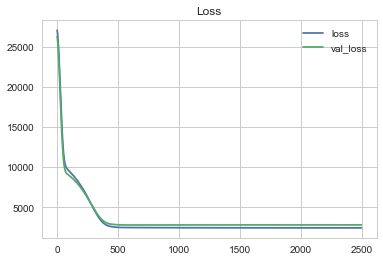

In [48]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.title("Loss")
plt.show()

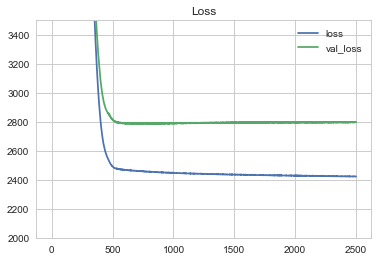

In [51]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.title("Loss")
plt.ylim([2000, 3500])
plt.show()

### 확인

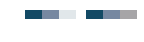

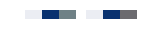

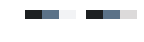

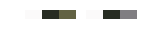

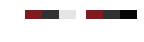

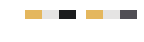

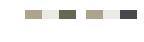

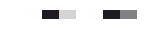

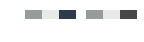

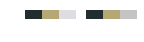

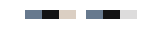

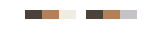

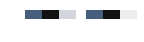

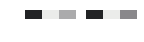

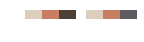

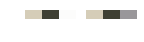

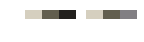

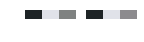

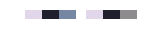

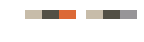

In [55]:
for idx in range(20):
    input_color = np.hstack([color1[idx], color2[idx]]).reshape(1,6) /256
    color_3_pre = model1.predict(input_color)[0]

    true = [color1[idx], color2[idx], color3[idx]]
    predict = [color1[idx], color2[idx], color_3_pre]
    
    bar_true = plot_colors([0.33, 0.33, 0.33], true, h=50, w=300)
    bar_predict = plot_colors([0.33, 0.33, 0.33], predict, h=50, w=300)
    
    plt.figure(figsize = (2, 1))  

    plt.subplot(1, 2, 1)
    plt.imshow(bar_true)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(bar_predict)
    plt.axis('off')
    plt.show()

### ColorMind 사용

In [22]:
import requests
import json

In [23]:
url = "http://colormind.io/api/"
data = {
    'model' : "default",
    'input' : [[44, 43, 44], [90, 83, 82], "N"]
}

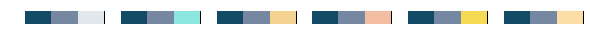

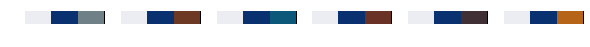

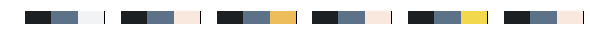

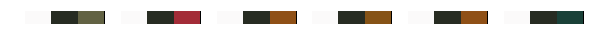

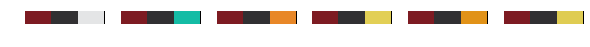

In [85]:
for idx in range(5):
    input_color = [color1[idx].tolist(), color2[idx].tolist(), "N"]
    data = {
    'model' : "default",
    'input' : input_color}
    
    plt.figure(figsize = (10, 1)) 
    
    
    true = [color1[idx], color2[idx], color3[idx]]
    bar_true = plot_colors([0.33, 0.33, 0.33], true, h=50, w=300)
    plt.subplot(1, 6, 1)
    plt.imshow(bar_true)
    plt.axis('off')

    for rand_idx in range(5):
        response = requests.post(url, data = json.dumps(data))
        color_3_pre = np.array(response.json()["result"][2])
        predict = [color1[idx], color2[idx], color_3_pre]
        bar_predict = plot_colors([0.33, 0.33, 0.33], predict, h=50, w=300)

        plt.subplot(1, 6, 2 + rand_idx)
        plt.imshow(bar_predict)
        plt.axis('off')
    plt.show()
    

### 색깔 추천 (컬러마인드에서 예측한 값과 가까운 값 , 예측한 값, 컬러마인드 나머지1)

[array([  19.32861825,   74.59376488,  101.89400857]), array([ 118.23544433,  136.80332436,  161.93016993]), array([ 225.54908553,  231.38313609,  234.0563475 ])]
[array([250, 184, 149]), array([ 166.87835693,  165.21559143,  167.00437927], dtype=float32), array([253, 221, 166])]


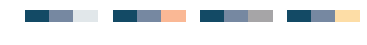

In [60]:
idx =0
input_color = np.hstack([color1[idx], color2[idx]]).reshape(1,6)

li_color_3_recom = []

# true color values
true = [color1[idx], color2[idx], color3[idx]]
bar_true = plot_colors([0.33, 0.33, 0.33], true, h=50, w=300)

# predict color values using dnn
color_3_pre = model1.predict(input_color/256)[0]
# get color values using colormind
li_color_3_colormind = []
request_color = [color1[idx].tolist(), color2[idx].tolist(), "N"]
data = {
'model' : "default",
'input' : request_color}

li_similar = []
li_color_3_colormind = []
for _ in range(3):
    response = requests.post(url, data = json.dumps(data))
    color_3_colormind = np.array(response.json()["result"][2])
    li_similar.append(np.linalg.norm(color_3_pre - color_3_colormind))
    li_color_3_colormind.append(color_3_colormind)
    
li_idx = np.argsort(np.array(li_similar))
# recommend color1
li_color_3_recom.append(li_color_3_colormind[li_idx[0]])
# recommend color2
li_color_3_recom.append(color_3_pre)
# recommend color3
li_color_3_recom.append(li_color_3_colormind[li_idx[1]])

# draw color bar
plt.subplot(1, 4, 1)
plt.imshow(bar_true)
plt.axis('off')
bar_true = plot_colors([0.33, 0.33, 0.33], true, h=50, w=300)
for recom_idx in range(3):
    recom = [color1[idx], color2[idx],  li_color_3_recom[recom_idx]]
    bar_recom = plot_colors([0.33, 0.33, 0.33], recom, h=50, w=300)
    plt.subplot(1, 4, 2+recom_idx)
    plt.imshow(bar_recom)
    plt.axis('off')

print(true)
print(li_color_3_recom)


# predict = [color1[idx], color2[idx], color_3_pre]
# bar_predict = plot_colors([0.33, 0.33, 0.33], predict, h=50, w=300)

In [15]:
from keras.models import load_model
import pandas as pd
import numpy as np
import requests
import urllib
import json

In [63]:
def recommand_color(color1, color2):
    '''
    recommand 3 colors
    input : main color1(RGB), sub color2(RGB)
    output : 
    recommand color1(RGB, nearest colormind from predict), 
    recommand color2(RGB, predict), 
    recommand color3(RGB, second colormind from predict)
    '''
    input_color = np.hstack([color1, color2]).reshape(1,6)

    li_color_3_recom = []
    # predict color values using dnn
    model = load_model("model/model1_dnn_normal.hdf5")
    color_3_pre = model.predict(input_color/256)[0]
    
    # get color values using colormind
    li_color_3_colormind = []
    request_color = [color1, color2, "N"]
    data = {
    'model' : "default",
    'input' : request_color}

    li_similar = []
    li_color_3_colormind = []
    
    url = 'http://colormind.io/api/'
    for _ in range(3):
        response = requests.post(url, data = json.dumps(data))
        color_3_colormind = np.array(response.json()["result"][2])
        li_similar.append(np.linalg.norm(color_3_pre - color_3_colormind))
        li_color_3_colormind.append(color_3_colormind)

    li_idx = np.argsort(np.array(li_similar))
    
    c1 = get_hex(li_color_3_colormind[li_idx[0]])
    c2 = get_hex(color_3_pre.astype(int))
    c3 = get_hex(li_color_3_colormind[li_idx[1]])
  
    #li_color_3_recom.append(c1, c2, c3)
    return c1, c2, c3

# predict = [color1[idx], color2[idx], color_3_pre]
# bar_predict = plot_colors([0.33, 0.33, 0.33], predict, h=50, w=300)

In [64]:
recommand_color([19.32861825, 74.59376488, 101.89400857], [118.23544433, 136.80332436, 161.93016993])

('#fab895', '#a6a5a7', '#f4c767')

In [26]:
def get_hdex(r, g, b):
    return '#%02x%02x%02x' % ( r, g, b)

In [53]:
def get_hex(color): 
    return '#%02x%02x%02x' % ( color[0], color[1], color[2])